# Computing Diefficiency Metrics with the diefpy Package

## Installing prerequisites for this iPython notebook

In [1]:
%pip -qq install diefpy pandas

Note: you may need to restart the kernel to use updated packages.


Import the library and other packages used in this tutorial.

In [2]:
import diefpy                                # the diefficiency library
import pandas as pd                          # for displaying the data in a nice way

COLORS = ["#ECC30B","#D56062","#84BCDA"]     # list of colors used throughout this tutorial

def head(array):
    """
    Method to facilitate displaying data in a nice table
    """
    display(pd.DataFrame(array).head())

## Data Preparation

To compute the diefficiency metrics **_dief@t_** and **_dief@k_**, we need the answer trace produces by the SPARQL query engines when executing queries.<br>
**Answer traces** record the exact point in time when an engine produces an answer during query execution.

For this tutorial, we executed SPARQL queries using three different configurations of the <a href="http://people.aifb.kit.edu/mac/nlde/">nLDE engine</a>: `Selective`,  `NotAdaptive`,  `Random`.<br>
The resulting answer trace for each query execution is stored in a CSV file available at <a href="https://ndownloader.figshare.com/files/9625852">FigShare</a> (137.06 MB). The structure of the CSV file is as follows:
<ul>
  <li><b>`test`</b>: id of the query executed. Example: 'Q9.sparql'</li>
  <li><b>`approach`</b>: name of the approach (or engine) used to execute the query. </li>
  <li><b>`answer`</b>: the value `i` indicates that this row corresponds to the ith answer produced by `approach` when executing `query`. </li>
  <li><b>`time`</b>: elapsed time (in seconds) since `approach` started the execution of `query` until the answer `i` is produced. </li>
</ul>

In [3]:
# Load the answer trace file with the query traces from FigShare.
traces = diefpy.load_trace("https://ndownloader.figshare.com/files/9625852")

In [4]:
# Inspect the trace file.
head(traces)

,test,approach,answer,time
0,Q11.sparql,Selective,1,8.670243
1,Q11.sparql,Selective,2,8.877625
2,Q11.sparql,Selective,3,8.878194
3,Q11.sparql,Selective,4,9.129733
4,Q11.sparql,Selective,5,9.132296


In addition, in this tutorial we are going to compare the performance of the nLDE engine using the metrics _dief@t_ and _dief@k_ as well as **conventional metrics** used in the query processing literature, such as: _execution time_, _time for the first tuple_, and _number of answers produced_.

For this tutorial, we measured the performance of the nLDE engine using conventional metrics. The results are available at another CSV file in <a href="https://ndownloader.figshare.com/files/9660316">FigShare</a> (2.86 KB). The structure of this CSV file is as follows: 
<ul>
  <li><b>`test`</b>: id of the query executed. Example: 'Q9.sparql'</li>
  <li><b>`approach`</b>: name of the approach (or engine) used to execute the query. </li>
  <li><b>`tfft`</b>: time (in seconds) required by `approach` to produce the first tuple when executing `query`. </li>
  <li><b>`totaltime`</b>: elapsed time (in seconds) since `approach` started the execution of `query` until the last answer  of `query` is produced. </li>
  <li><b>`comp`</b>: number of answers produced by `approach` when executing `query`. </li>
</ul>

In [5]:
# Load the result of the other metrics (execution time, etc.) from FigShare.
metrics = diefpy.load_metrics("https://ndownloader.figshare.com/files/9660316")

In [6]:
# Inspect the metrics file
head(metrics)

,test,approach,tfft,totaltime,comp
0,Q11.sparql,NotAdaptive,5.886026,300.029238,1287
1,Q12.sparql,NotAdaptive,13.681366,74.351807,4834
2,Q13.sparql,NotAdaptive,23.121218,300.014343,14371
3,Q14.sparql,NotAdaptive,162.549945,300.013419,3
4,Q15.sparql,NotAdaptive,6.423510,300.039445,3430


## Visualizing Execution Time of SPARQL Query Engines

In a classical analysis of the performance of query engines, plots to compare the overall execution time of the different query engines per query are presented.

With the `diefpy` package, it is possible to generate these plots from the metrics file using the `diefpy.plot_execution_time` method.

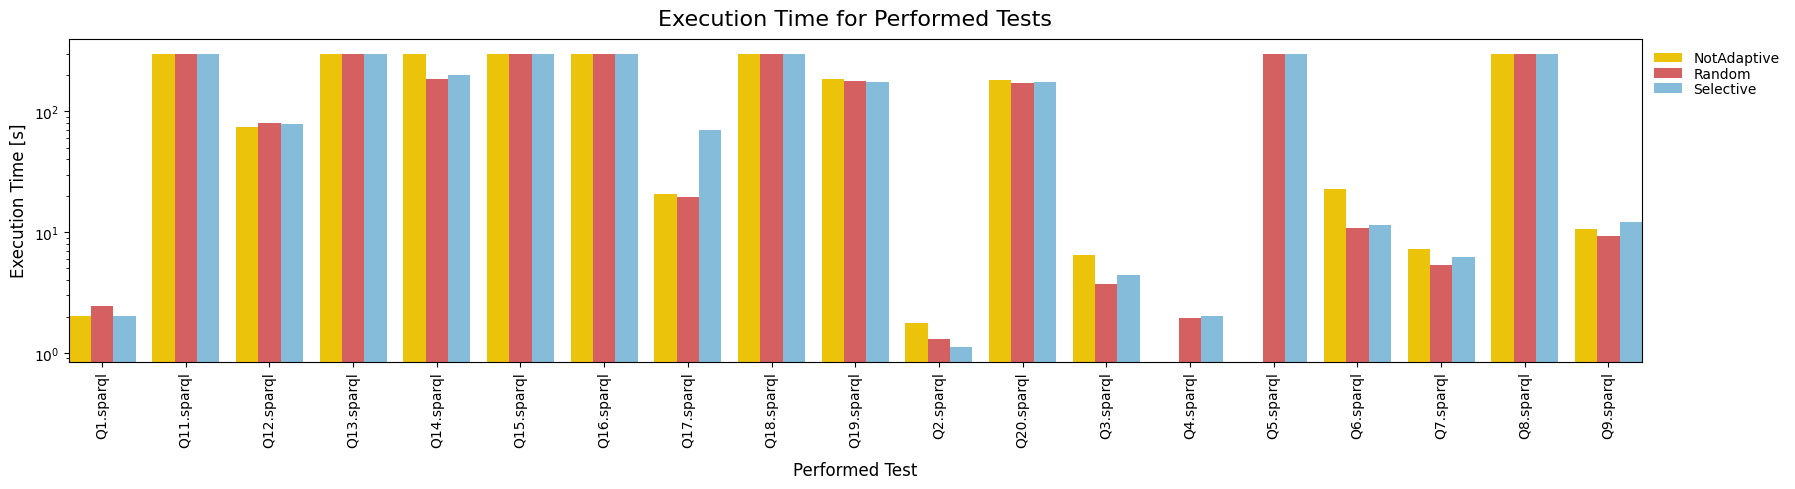

In [7]:
# Plot the execution times of all queries and query engines as a bar chart from the metrics file.
diefpy.plot_execution_time(metrics, COLORS, log_scale=True).show(warn=False)

**Conclusion:** For most of the queries, the performance of the different approaches is comparable in terms of execution time. nLDE `Not Adaptive` is not able to produce results for the queries `Q4.sparql` and `Q5.sparql`. Additionally, the nLDE `Selective` outperforms the other approaches for query `Q2.sparql` while exhibiting the worst performance for query `Q17.sparql`.

## Visualizing Answer Traces of Continuous SPARQL Query Engines

To measure the diefficiency of approaches, the metrics **_dief@t_** and **_dief@k_** compute the are under the curve (AUC) of the **answer traces**. Answer traces record the points in time when an approach produces an answer.

With the `diefpy` package, it is possible to plot the answer trace of a SPARQL query engine when executing a query using the `diefpy.plot_answer_trace` method.

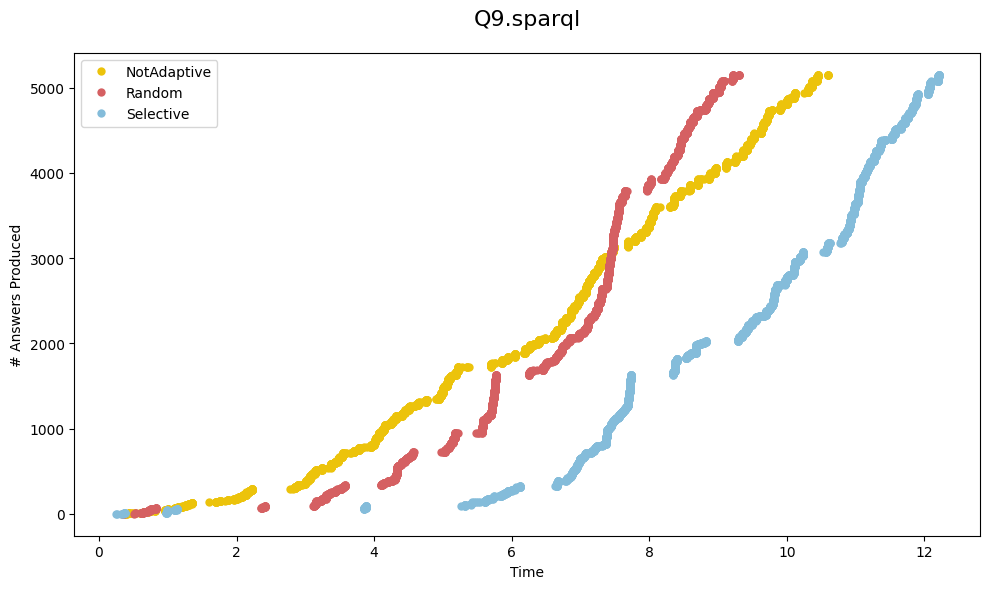

In [8]:
# Plot the answer trace recorded in `traces` for query `Q9.sparql`
diefpy.plot_answer_trace(traces, "Q9.sparql", COLORS).show(warn=False)

To plot the answer traces for all queries in the benchmark, use the following approach:

In [ ]:
for fig in diefpy.plot_all_answer_traces(traces, COLORS):
    fig.show(warn=False)

**Conclusion:** For `Q9.sparql`, we obseve that the answer trace of nLDE `Not Adaptive` (yellow line) surpasses the answer traces of the other approaches. This indicates that nLDE `Not Adaptive` continuously produces more answers than the other approaches.

## Measuring Performance with dief@t

The metric **_dief@t_** measures the diefficiency of an engine in the first _t_ time units of query execution. Intuitively, approaches that produce answers at a higher rate in a certain period of time are more efficient. **_dief@t interpretation: Higher is better._**

The `diefpy.dieft` method computes the **_dief@t_** metric as follows.

In [9]:
# Compute dief@t of the approaches recorded in `traces` when executing `Q9.sparql`
# until the time unit 10 (here: in seconds).
head(diefpy.dieft(traces, "Q9.sparql", 10))

,test,approach,dieft
0,Q9.sparql,NotAdaptive,17267.573207
1,Q9.sparql,Random,16581.043213
2,Q9.sparql,Selective,6018.930233


In [10]:
# Compute dief@t of the approaches recorded in `traces` when executing `Q9.sparql`
# until the time unit when the slowest approach finalizes its execution.
head(diefpy.dieft(traces, "Q9.sparql"))

,test,approach,dieft
0,Q9.sparql,NotAdaptive,28563.157692
1,Q9.sparql,Random,27963.929358
2,Q9.sparql,Selective,14588.184761


## Comparing dief@t with Other Metrics

Experiment 1 in [1] compares the performance of three variants of nlDE using conventional metrics from the query processing literature and **_dief@t_**.

The method `diefpy.performance_of_approaches_with_dieft` computes the results reported in the previously mentioned experiment, i.e., **_dief@t_**, _time to first tuple_, _execution time_, _number of answers produced_, _throughput_, _inverse time to first tuple_, and _inverse execution time_.

In [11]:
# Create all metrics from the `traces` and `metrics`
exp1 = diefpy.performance_of_approaches_with_dieft(traces, metrics)

In [12]:
# Inspect the results for query `Q9.sparql`
# `throughput` is computed as comp/totaltime.
# `invtfft` is computed as 1/tfft.
# `invtotaltime` is computed as 1/totaltime.
head(exp1[exp1['test'] == "Q9.sparql"])

,test,approach,tfft,totaltime,comp,throughput,invtfft,invtotaltime,dieft
0,Q9.sparql,NotAdaptive,0.371084,10.592792,5151,486.274072,2.694808,0.094404,28563.157692
1,Q9.sparql,Random,0.332650,9.303557,5151,553.659213,3.006163,0.107486,27963.929358
2,Q9.sparql,Selective,0.241630,12.209977,5151,421.868120,4.138558,0.081900,14588.184761


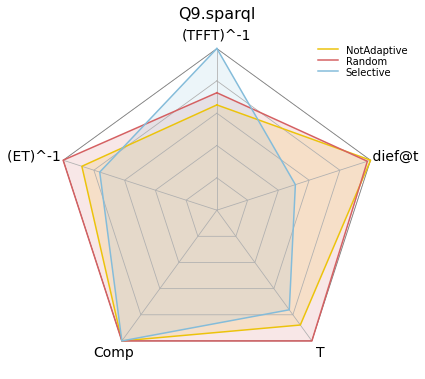

In [13]:
# Create radar plot to compare the performance of the approaches with dief@t and other metrics.
# Plot interpretation: Higher is better.
diefpy.plot_performance_of_approaches_with_dieft(exp1, "Q9.sparql", COLORS).show(warn=False)

To plot the results for all queries in the benchmark, use the following approach:

In [ ]:
for fig in diefpy.plot_all_performance_of_approaches_with_dieft(exp1, COLORS):
    fig.show(warn=False)

**Conclusion:** For `Q9.sparql`, the values of the metrics from the literature indicate that the three nLDE variants are competitive approaches. Yet, _dief@t_ allows for uncovering that nLDE `Not Adaptive` is able to continuously produce answers at a faster rate than the other approaches for this query until the slowest approach finalizes its execution.

## Measuring Performance with dief@k

The metric **_dief@k_** measures the diefficiency of a query engine while producing the first _k_ answers when executing a query. Intuitively, approaches that require a shorter period of time to produce a certain number of answers are more efficient. **_dief@k interpretation: Lower is better._**

The `diefpy.diefk` and `diefpy.diefk2` methods compute the **_dief@k_** metric as follows.

In [14]:
# Compute dief@k of the approaches recorded in `traces` when executing `Q9.sparql`
# and producing the first 2,000 answers.
head(diefpy.diefk(traces, "Q9.sparql", 2000))

,test,approach,diefk
0,Q9.sparql,NotAdaptive,4686.110721
1,Q9.sparql,Random,3517.679419
2,Q9.sparql,Selective,3235.550629


In [15]:
# Compute dief@k of the approaches recorded in `traces` when executing `Q9.sparql`
# and producing the first k answers, where k is the minimum of the total answers
# produced among all the approaches.
head(diefpy.diefk(traces, "Q9.sparql"))

,test,approach,diefk
0,Q9.sparql,NotAdaptive,20232.388727
1,Q9.sparql,Random,12992.974714
2,Q9.sparql,Selective,14588.184761


In [16]:
# Compute dief@k of the approaches recorded in `traces` when executing `Q9.sparql`
# and producing 50% of the answers.
head(diefpy.diefk2(traces, "Q9.sparql", 0.50))

,test,approach,diefk
0,Q9.sparql,NotAdaptive,6162.528256
1,Q9.sparql,Random,4636.632188
2,Q9.sparql,Selective,5537.020660


## Measuring dief@t at Different Answer Completeness Percentages

Experiment 2 in [1] compares the performance of the three variants of nLDE when producing different answer completeness percentages (25%, 50%, 75%, 100%) using **_dief@k_**.

The method `diefpy.continuous_efficiency_with_diefk` computes the **_dief@k_** metric for the previously mentioned answer completeness percentages.

In [17]:
# Compute dief@k for 25%, 50%, 75%, and 100% answer completeness
exp2 = diefpy.continuous_efficiency_with_diefk(traces)

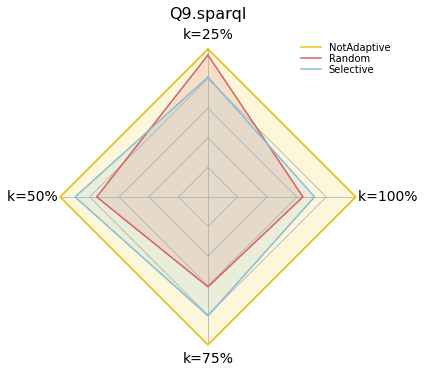

In [18]:
# Create radar plot to compare the performance of the approaches with dief@k
# at different answer completeness percentages (25%, 50%, 75%, 100%).
# Plot interpretation: Lower is better.
diefpy.plot_continuous_efficiency_with_diefk(exp2, 'Q9.sparql', COLORS).show(warn=False)

To plot the results for all queries in the benchmark, use the following approach:

In [ ]:
for fig in diefpy.plot_all_continuous_efficiency_with_diefk(exp2, COLORS):
    fig.show(warn=False)

**Conclusion:** For `Q9.sparql`, the variants nLDE `Random` and `Not Adaptive` exhibit similar values of **_dief@k_** while producing the first 25% of the answers. However, when looking at **_dief@k_** at 100%, we can conclude that once nlDE `Random` starts producing answers, it produces all the answers at a faster rate. This can be observed in the answer trace plot, where the trace for nLDE `Random` (red line) has a higher slope over time than the other approaches.

## References

[1] Maribel Acosta, Maria-Esther Vidal, York Sure-Vetter. Diefficiency Metrics: Measuring the Continuous Efficiency of Query Processing Approaches. In Proceedings of the International Semantic Web Conference, 2017.